# Inciso 1

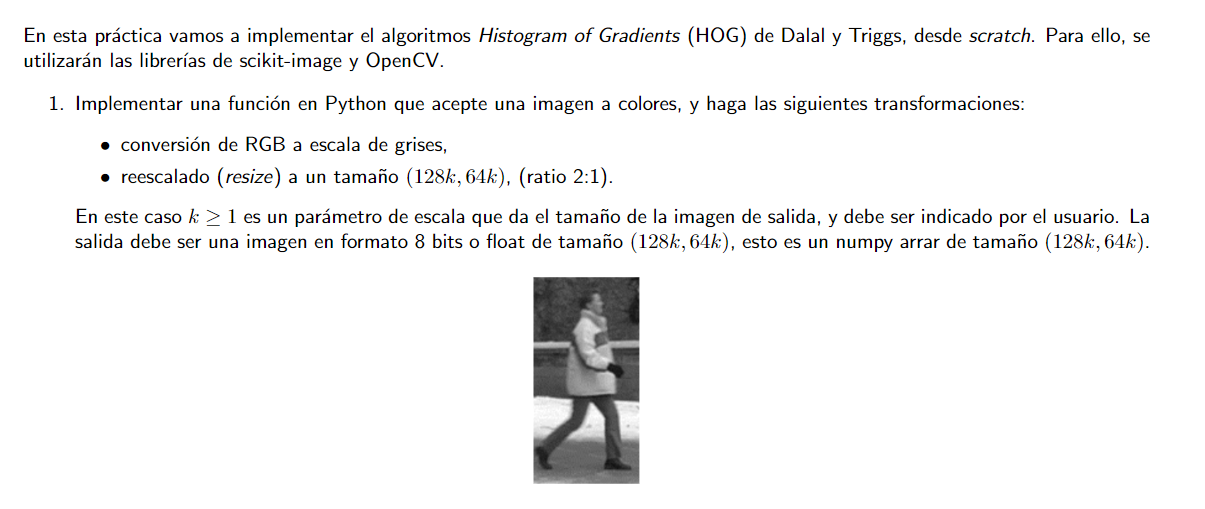

(128, 64) uint8


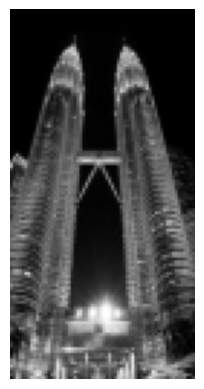

In [1]:
from skimage import io, color, transform
import numpy as np
import matplotlib.pyplot as plt

# Función para convertir y reescalar una imagen
def convert_and_resize_image(image_path, k):
    # Cargar la imagen
    image = io.imread(image_path)

    # Verificar si la imagen ya está en escala de grises
    if len(image.shape) > 2 and image.shape[2] == 3:
        # Convertir la imagen a escala de grises
        image_gray = color.rgb2gray(image)
    else:
        image_gray = image

    # Reescalar la imagen
    new_size = (128 * k, 64 * k)
    image_resized = transform.resize(image_gray, new_size, anti_aliasing=True)
    
    # Convertir a formato de 8 bits
    image_8bit = (image_resized * 255).astype(np.uint8)
    return image_8bit


image_path = './images/towers.jpg' 
k = 1 
image_resized = convert_and_resize_image(image_path, k)

# Verificar resultado
print(image_resized.shape, image_resized.dtype)

# Display the resized image
plt.imshow(image_resized, cmap='gray')
plt.axis('off') # Hide axis
plt.show()


# Inciso 2

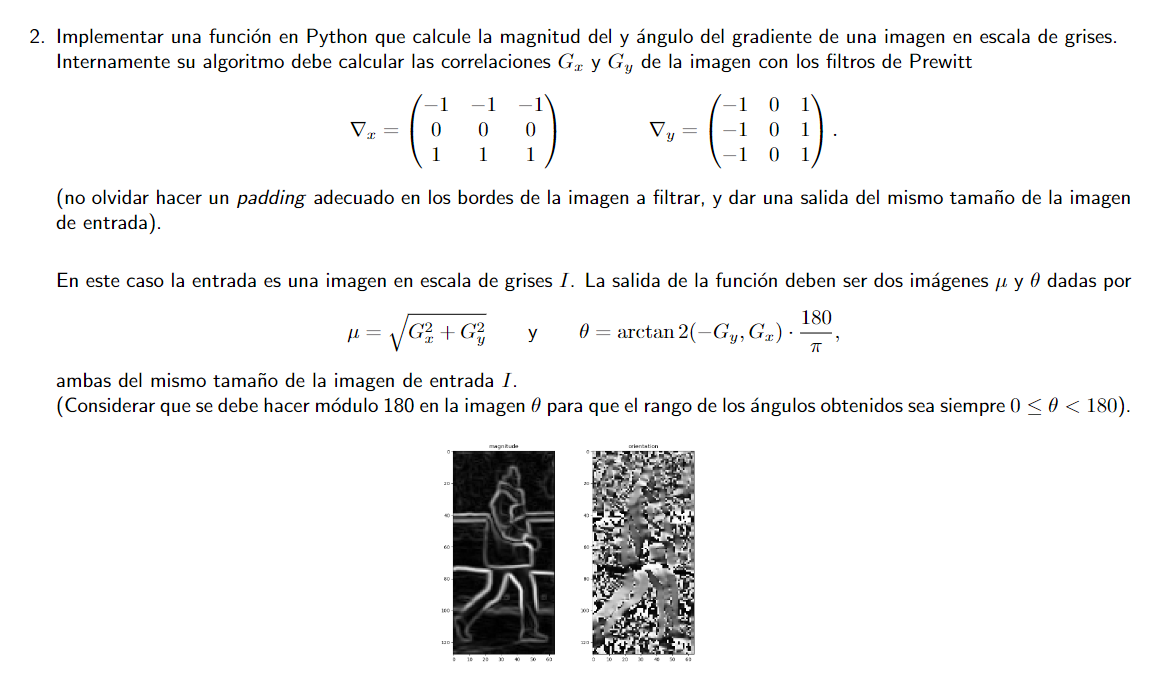

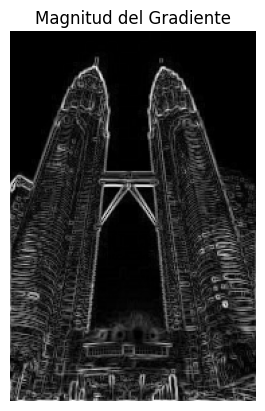

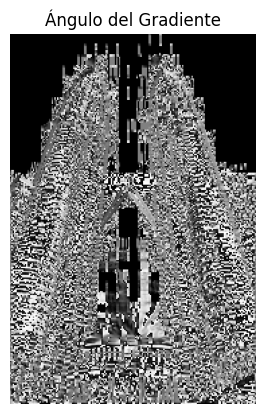

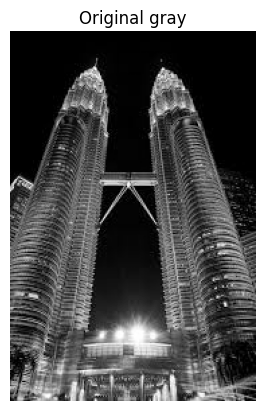

In [2]:
from skimage import io, color
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# Carga la imagen en escala de grises
image_path = './images/towers.jpg'
image_gray = io.imread(image_path, as_gray=True)

# Convierte a 8-bit si es necesario
if image_gray.dtype == np.float64:
    image_gray = (image_gray * 255).astype(np.uint8)

# Define los filtros de Prewitt
prewitt_x = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])

prewitt_y = np.array([[-1,  0,  1],
                      [-1,  0,  1],
                      [-1,  0,  1]])

# Función para calcular la magnitud y el ángulo del gradiente de la imagen
def gradient_magnitude_and_angle(image):
    # Calcula las correlaciones Gx y Gy
    Gx = ndimage.convolve(image.astype(float), prewitt_x, mode='constant', cval=0.0)
    Gy = ndimage.convolve(image.astype(float), prewitt_y, mode='constant', cval=0.0)

    # Calcula la magnitud y el ángulo del gradiente
    magnitude = np.sqrt(Gx**2 + Gy**2)
    angle = np.arctan2(Gy, Gx) * (180 / np.pi)
    
    # Asegura que el ángulo esté en el rango [0, 180)
    angle = angle % 180

    # Normaliza la magnitud al rango 0-255
    magnitude = (magnitude / magnitude.max() * 255).astype(np.uint8)
    return magnitude, angle

# Calcula la magnitud y el ángulo del gradiente
gradient_magnitude, gradient_angle = gradient_magnitude_and_angle(image_gray)

# Muestra la magnitud del gradiente
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Magnitud del Gradiente')
plt.axis('off')
plt.show()

# Muestra el ángulo del gradiente
plt.imshow(gradient_angle, cmap='gray')
plt.title('Ángulo del Gradiente')
plt.axis('off')
plt.show()

plt.imshow(image_gray, cmap='gray')
plt.title('Original gray')
plt.axis('off') 
plt.show()
